# Explore here

In [13]:
import pandas as pd

# Cargar el dataset
file_path = '../data/raw/demographic_health_data.csv'
df = pd.read_csv(file_path)

# Análisis descriptivo básico
shape = df.shape
info = df.info()
describe = df.describe()

(shape, info, describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


((3140, 108),
 None,
                fips       TOT_POP           0-9  0-9 y/o % of total pop  \
 count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
 mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
 std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
 min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
 25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
 50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
 75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
 max    56045.000000  1.010552e+07  1.208253e+06               25.460677   
 
              19-Oct  10-19 y/o % of total pop         20-29  \
 count  3.140000e+03               3140.000000  3.140000e+03   
 mean   1.336798e+04                 12.694609  1.446933e+04   
 std    4.228439e+04                  1.815044  4.957773e+04   
 min    0.000000e+00                 

El dataset incluye columnas con 61 variables de tipo float64, 45 variables de tipo int64, y 2 variables de tipo object. Esto sugiere que la mayoría de las variables son numéricas.

Decisión sobre la variable objetivo:
Dado que el objetivo del análisis es entender la relación entre recursos sanitarios y datos sociodemográficos, sugiero elegir una variable relacionada con la salud como variable objetivo. Se elige:

diabetes_prevalence: Prevalencia de la diabetes por condado.


In [7]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

# Analizar los valores nulos
null_values = df.isnull().sum()

# Mostrar columnas con valores nulos
null_values = null_values[null_values > 0]
print(null_values)

Series([], dtype: int64)


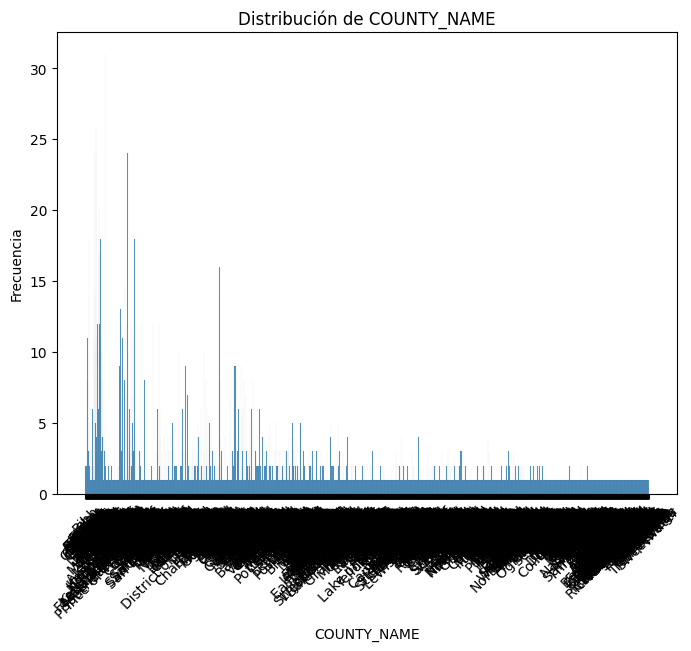

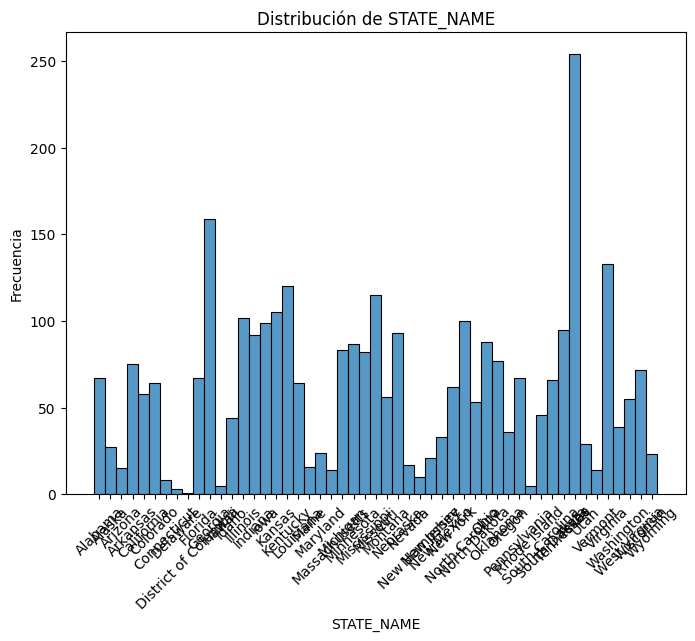

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Graficar las variables categóricas
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], discrete=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

Al observar los histogramas, podemos hacernos una idea de cuántos condados son rurales o urbanos y si las categorías están equilibradas o no. Si la mayoría de los condados pertenecen a una sola categoría, eso podría influir en cómo se relacionan los datos sociodemográficos con los recursos de salud.

Como tenemos 100 varialbes numericas , vamos a proceder primero para filtrarlas y categorizarlas para poder utilizar aquellas que tenga interes para nuestor modelo.

Variables demográficas:

TOT_POP: Población total.
Age groups (e.g., 0-9, 10-19, etc.): Distribución por grupos de edad.
R_birth_2018, R_death_2018: Tasas de natalidad y mortalidad.
Less than a high school diploma 2014-18, High school diploma only 2014-18, etc.: Niveles de educación.
Variables económicas:

MEDHHINC_2018: Ingreso medio de los hogares.
Unemployment_rate_2018: Tasa de desempleo.
Recursos sanitarios:

Active Physicians per 100000 Population 2018 (AAMC): Número de médicos activos por cada 100,000 personas.
ICU Beds_x: Número de camas en UCI.
Enfermedades crónicas:

Obesity_prevalence: Prevalencia de la obesidad.
Heart disease_prevalence: Prevalencia de enfermedades cardíacas.
COPD_prevalence: Prevalencia de la enfermedad pulmonar obstructiva crónica.

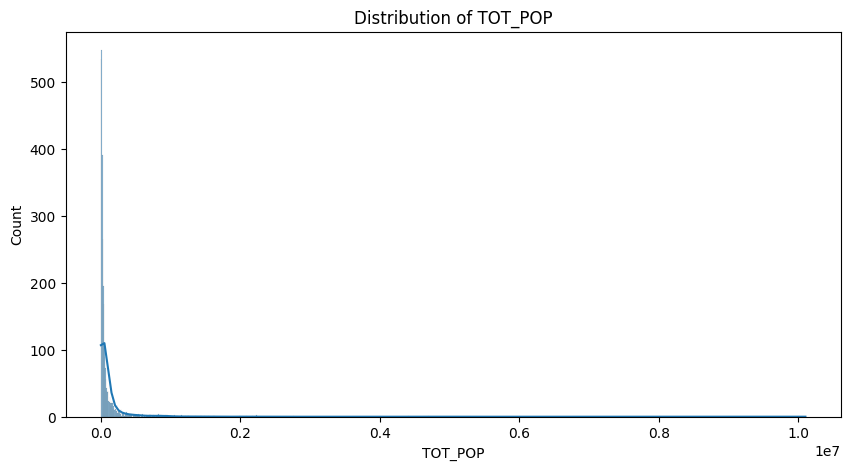

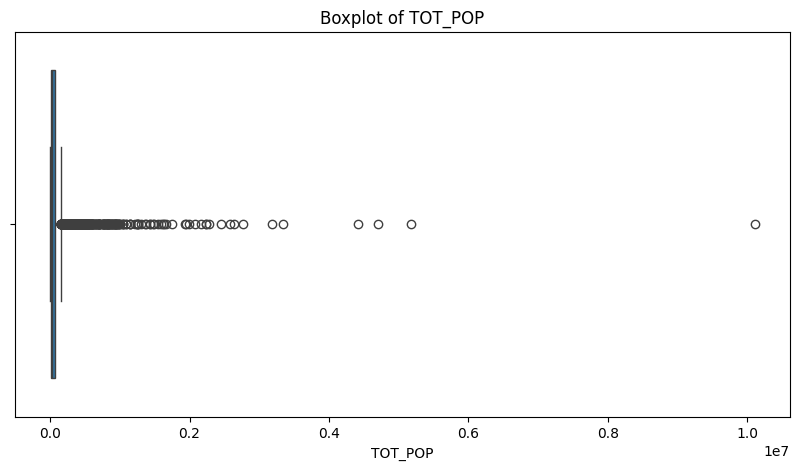

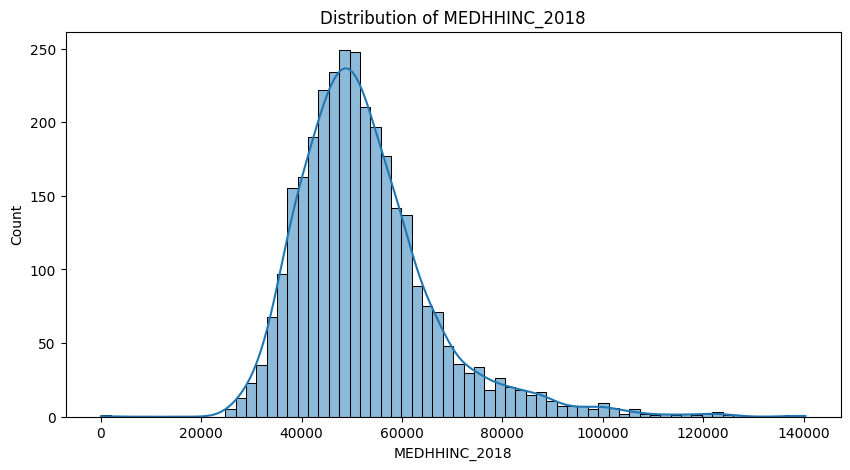

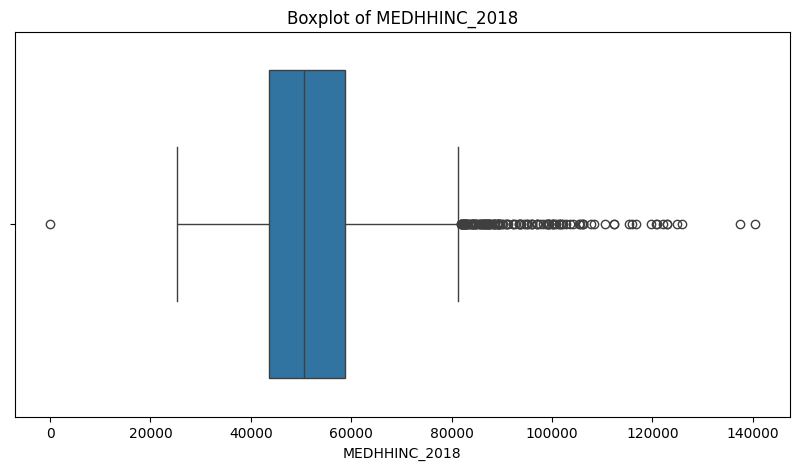

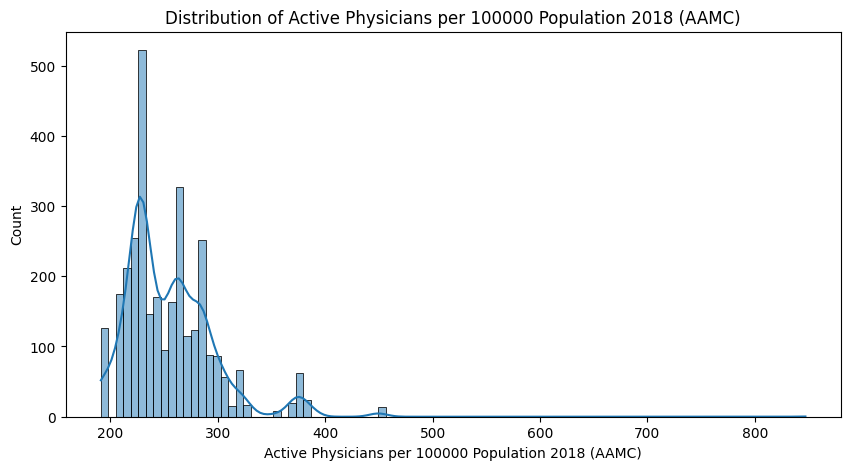

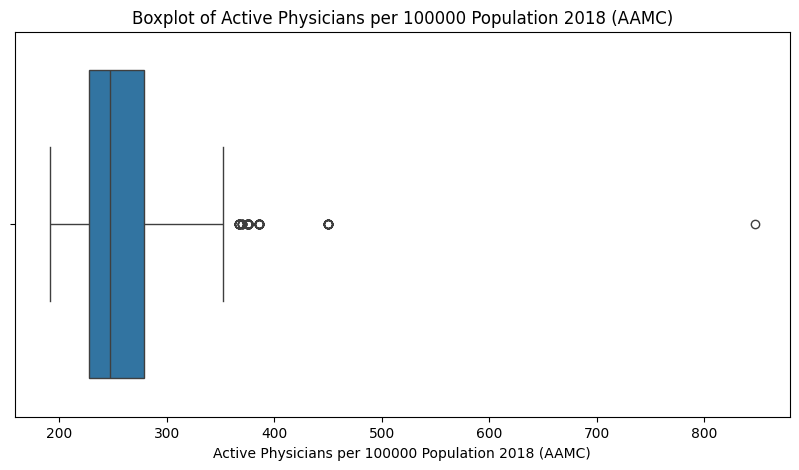

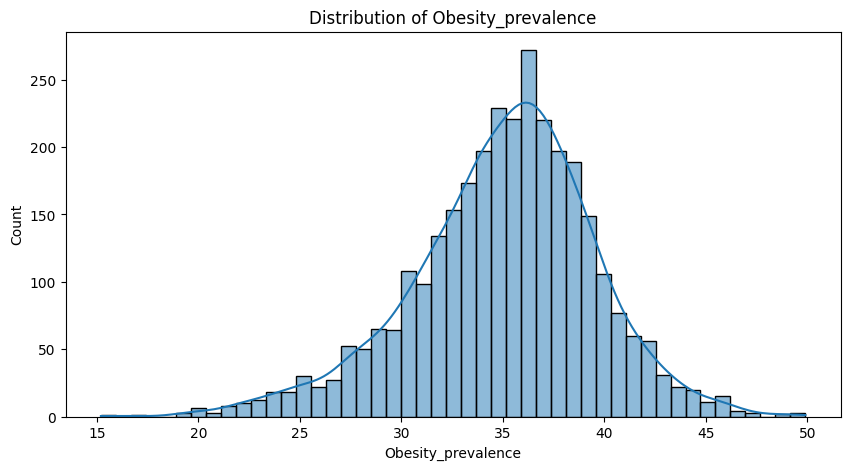

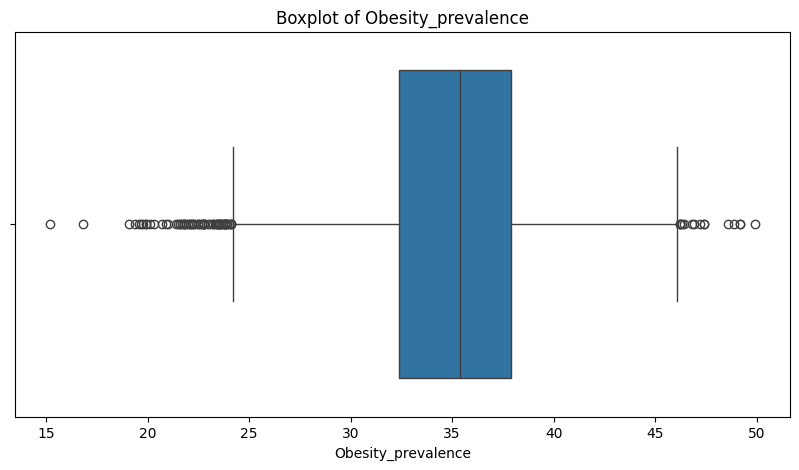

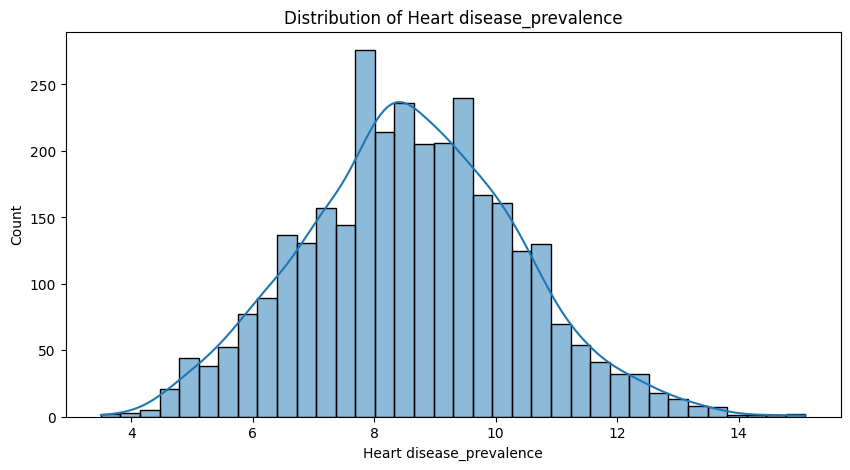

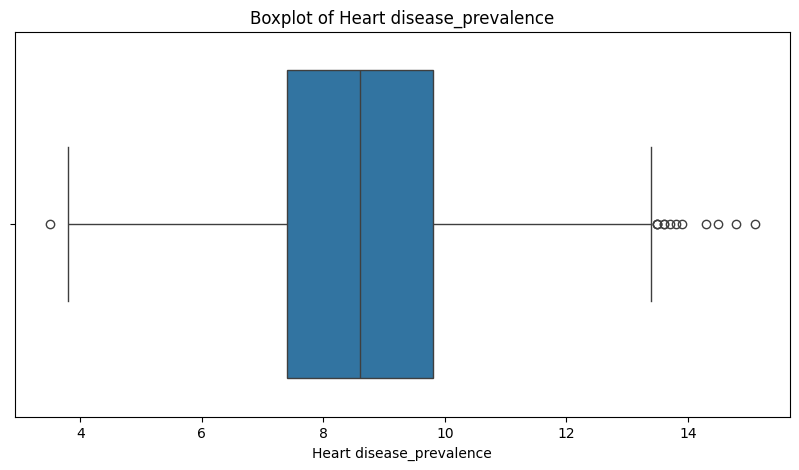

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables seleccionadas
variables_to_plot = [
    'TOT_POP',
    'MEDHHINC_2018',
    'Active Physicians per 100000 Population 2018 (AAMC)',
    'Obesity_prevalence',
    'Heart disease_prevalence'
]

# Graficar las variables seleccionadas
for var in variables_to_plot:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

Outliers:

In [11]:
# Función para identificar los outliers usando el rango intercuartil (IQR)
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Revisar outliers en cada una de las variables seleccionadas
for var in variables_to_plot:
    outliers = detect_outliers(df, var)
    print(f'Outliers in {var}:')
    print(outliers[[var]].head(), "\n")

Outliers in TOT_POP:
    TOT_POP
1    218022
36   659300
40   163941
44   366519
48   413757 

Outliers in MEDHHINC_2018:
     MEDHHINC_2018
67           82633
68           82113
84           89276
184         101744
190         101463 

Outliers in Active Physicians per 100000 Population 2018 (AAMC):
      Active Physicians per 100000 Population 2018 (AAMC)
317                                               847.0  
1191                                              386.0  
1192                                              386.0  
1193                                              386.0  
1194                                              386.0   

Outliers in Obesity_prevalence:
     Obesity_prevalence
170                47.4
184                23.4
190                23.1
204                21.4
212                22.1 

Outliers in Heart disease_prevalence:
     Heart disease_prevalence
100                      14.5
344                      13.6
377                      13.7
410        

Voy a eliminar las filas que contienen outliers utilizando el rango intercuartil (IQR) para cada una de las variables seleccionadas. Si una fila tiene un outlier en cualquiera de estas variables, será eliminada.

In [12]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Eliminar outliers de todas las variables seleccionadas
for var in variables_to_plot:
    df = remove_outliers(df, var)

# Mostrar el nuevo tamaño del dataset
print(df.shape)

(2453, 108)


Después de eliminar los outliers, el dataset ahora tiene 2453 filas (en comparación con las 3140 originales). Esto indica que hemos eliminado aproximadamente un 22% de los datos que contenían valores extremos en las variables seleccionadas.

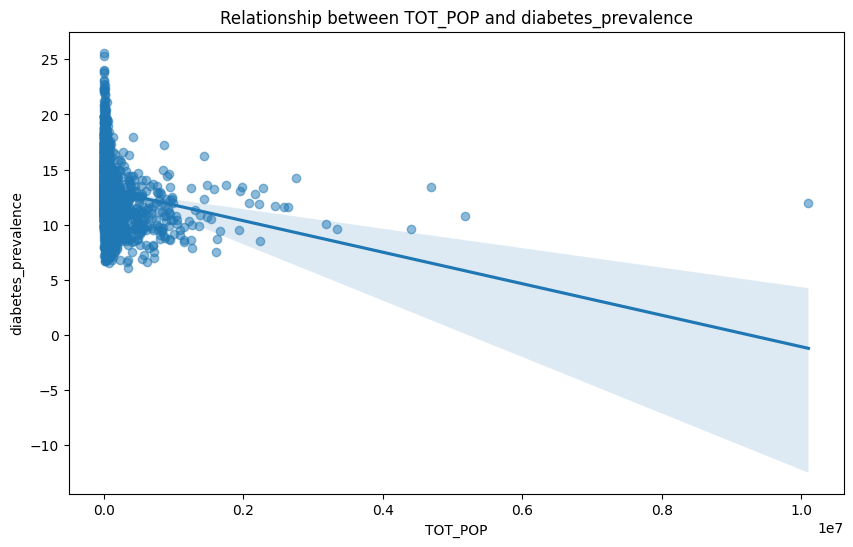

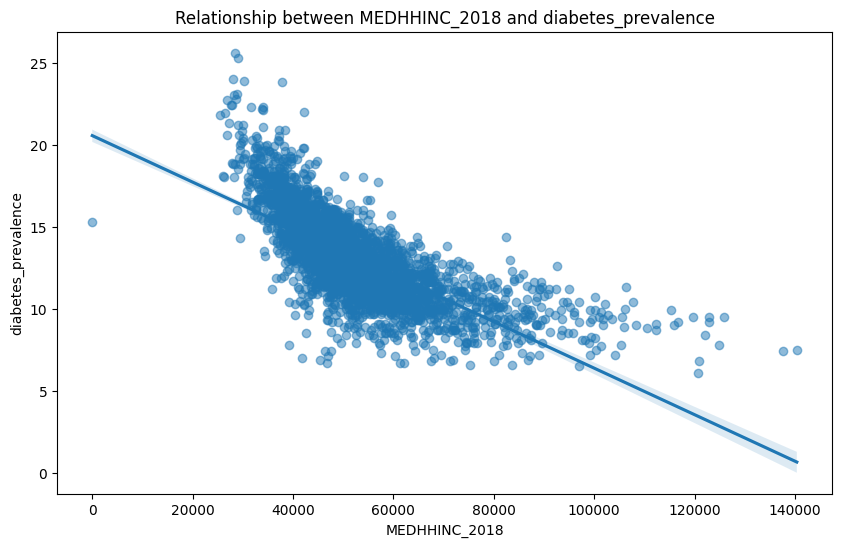

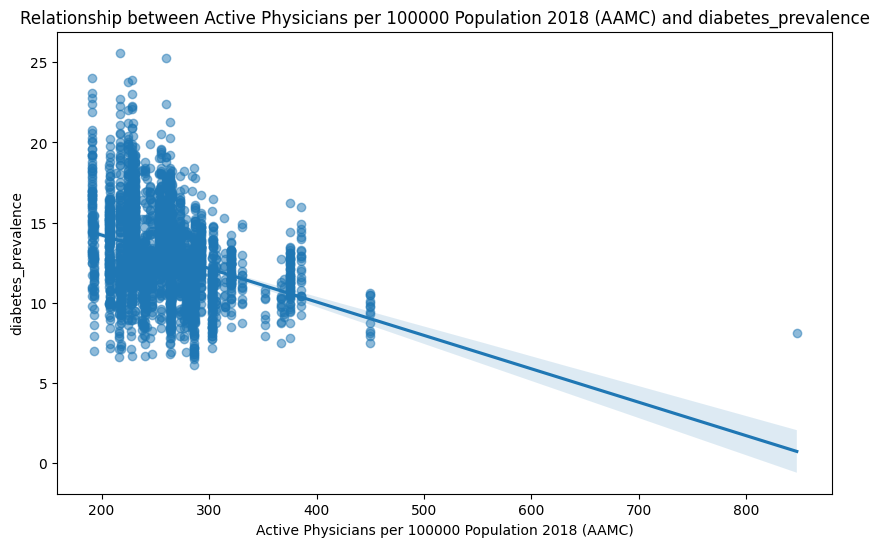

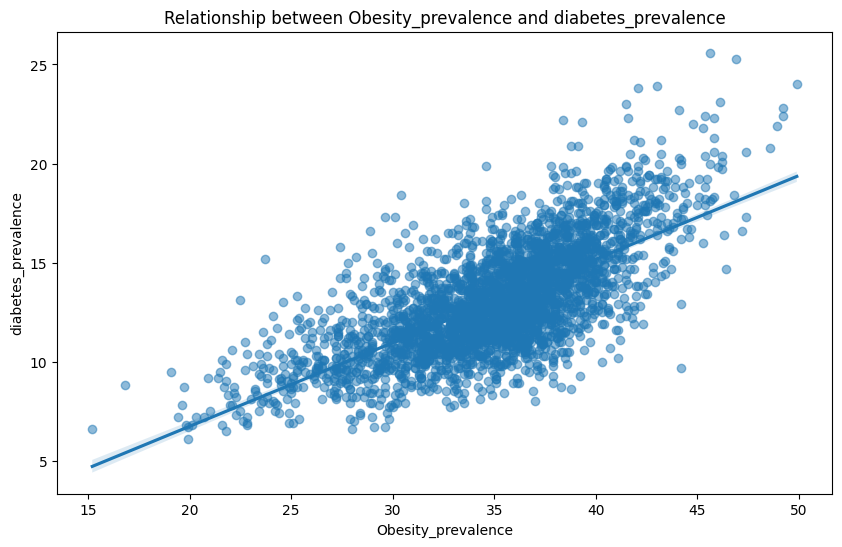

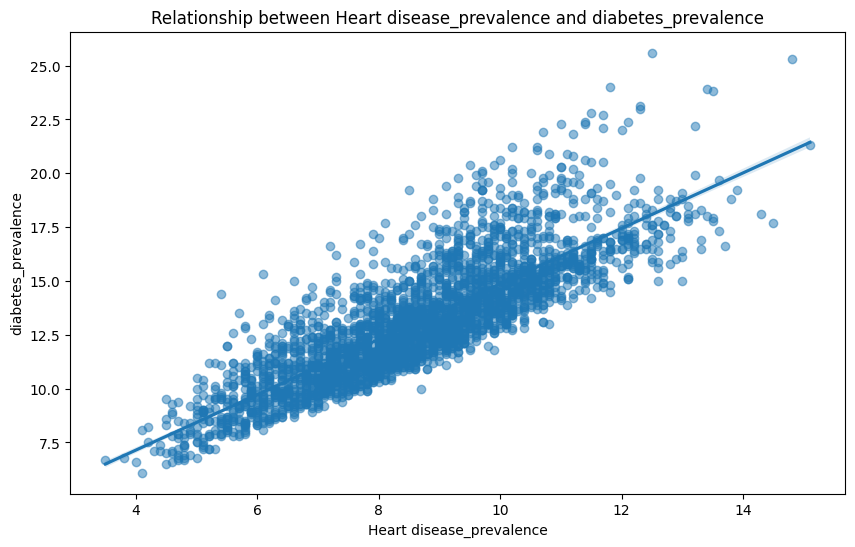

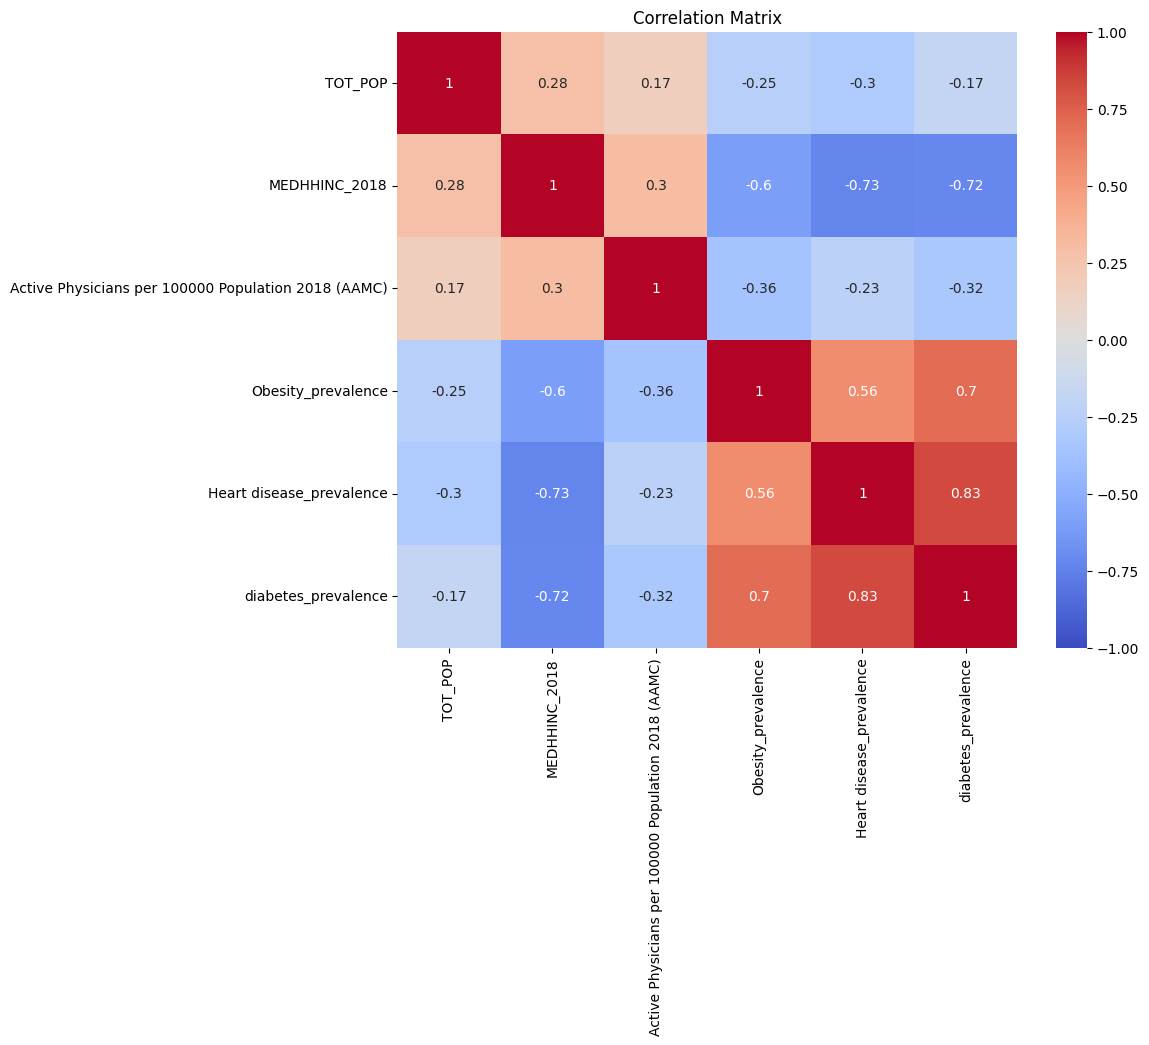

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagramas de dispersión con línea de regresión
for var in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[var], y=df['diabetes_prevalence'], scatter_kws={'alpha':0.5})
    plt.title(f'Relationship between {var} and diabetes_prevalence')
    plt.xlabel(var)
    plt.ylabel('diabetes_prevalence')
    plt.show()

# Matriz de correlación
corr_matrix = df[variables_to_plot + ['diabetes_prevalence']].corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Diagramas de dispersión con línea de regresión:

Observamos la relación entre la prevalencia de diabetes y las variables seleccionadas:
Población total (TOT_POP): La relación no es clara, indicando que la cantidad de población no tiene un impacto directo en la prevalencia de diabetes.
Ingreso medio de los hogares (MEDHHINC_2018): La relación es ligeramente negativa, lo que sugiere que a medida que aumentan los ingresos, la prevalencia de diabetes tiende a disminuir.
Número de médicos por cada 100,000 personas (Active Physicians per 100000 Population 2018 (AAMC)): La relación no es muy fuerte, pero parece haber una tendencia negativa.
Prevalencia de obesidad (Obesity_prevalence): Existe una fuerte relación positiva, lo que es consistente con la literatura médica.
Prevalencia de enfermedades cardíacas (Heart disease_prevalence): También muestra una correlación positiva con la diabetes.
Matriz de correlación:

La prevalencia de obesidad muestra la correlación positiva más fuerte con la prevalencia de diabetes.
Los ingresos medios y la cantidad de médicos muestran correlaciones negativas, aunque no tan fuertes.
El número de médicos por cada 100,000 personas tiene una baja correlación con la prevalencia de diabetes.

Diabetes_prevalence y Heart disease_prevalence tienen una correlación alta de 0.83.
Esta correlación es lo suficientemente fuerte como para considerar que ambas variables podrían estar midiendo información similar (ambas están relacionadas con condiciones crónicas que comparten factores de riesgo). Esto podría ser un indicador de redundancia en el análisis.

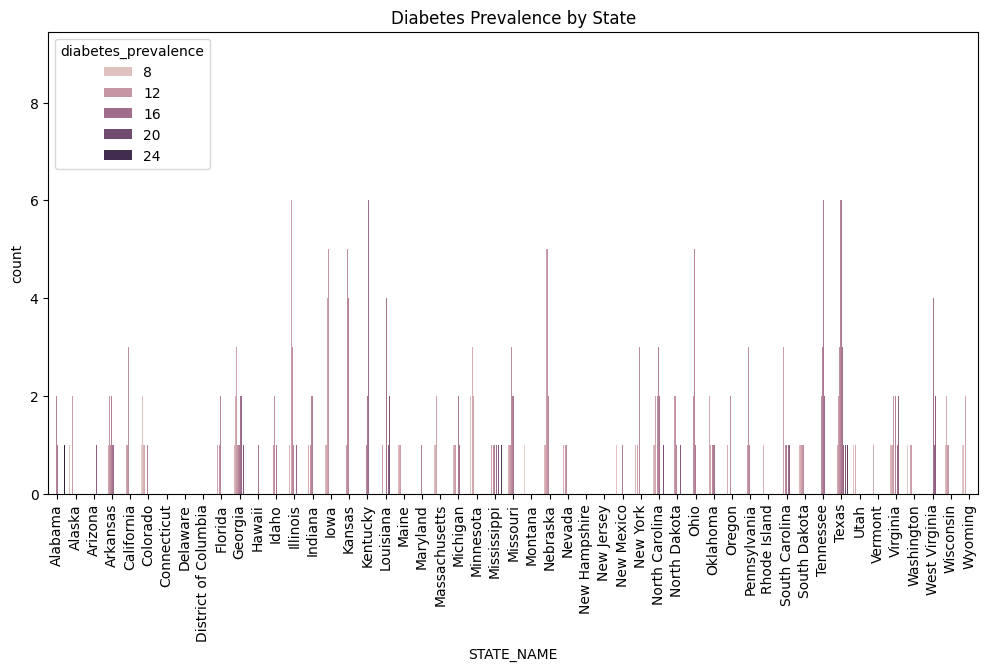

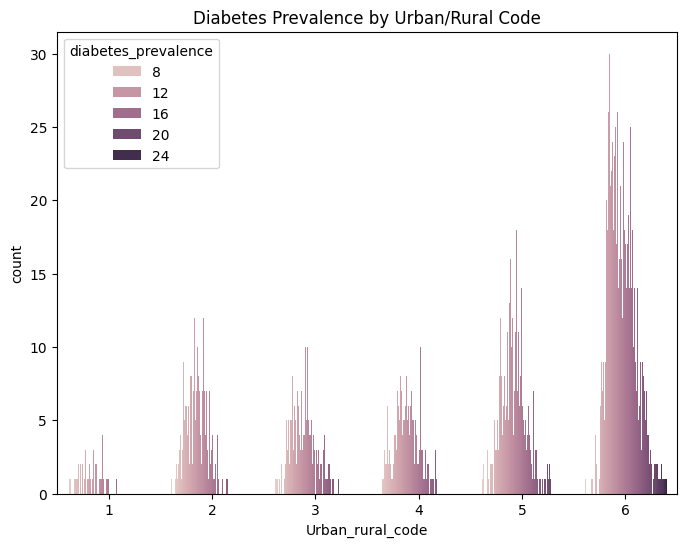

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la relación entre STATE_NAME y diabetes_prevalence
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='STATE_NAME', hue='diabetes_prevalence')
plt.title('Diabetes Prevalence by State')
plt.xticks(rotation=90)
plt.show()

# Graficar la relación entre Urban_rural_code y diabetes_prevalence (si estuviera disponible)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Urban_rural_code', hue='diabetes_prevalence')
plt.title('Diabetes Prevalence by Urban/Rural Code')
plt.show()

Con el countplot no se ve nada way.


/tmp/ipykernel_8415/1915291325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='STATE_NAME', y='diabetes_prevalence', palette='Set2')


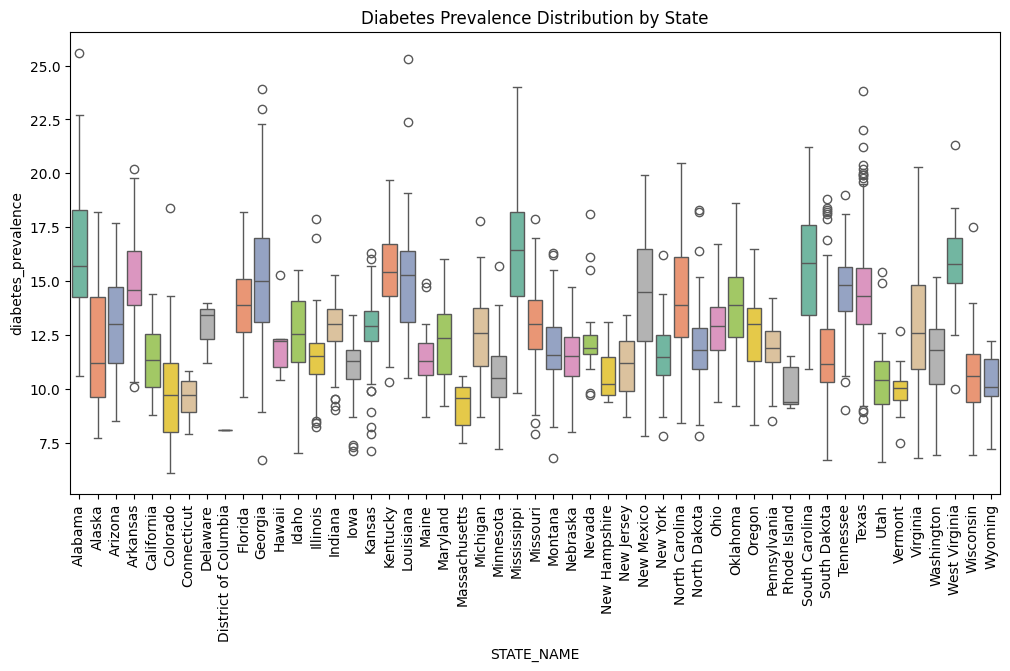

/tmp/ipykernel_8415/1915291325.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Urban_rural_code', y='diabetes_prevalence', palette='Set3')


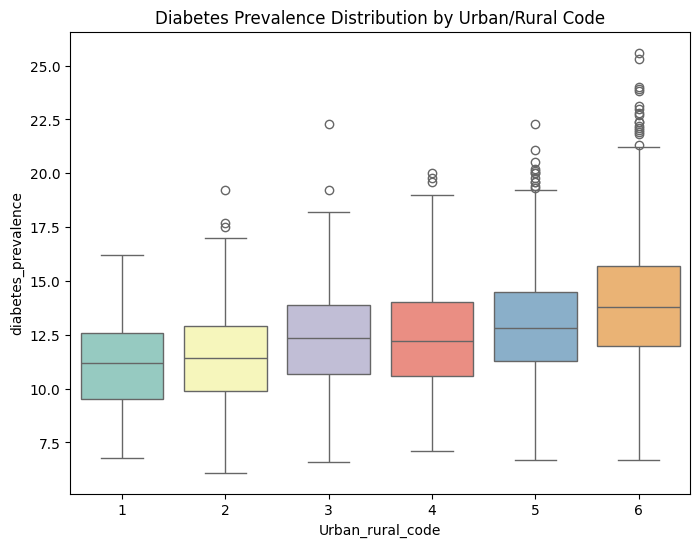

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para ver la distribución de diabetes_prevalence por estado
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='STATE_NAME', y='diabetes_prevalence', palette='Set2')
plt.title('Diabetes Prevalence Distribution by State')
plt.xticks(rotation=90)
plt.show()

# Boxplot para ver la distribución de diabetes_prevalence por urban/rural code
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Urban_rural_code', y='diabetes_prevalence', palette='Set3')
plt.title('Diabetes Prevalence Distribution by Urban/Rural Code')
plt.show()

Los gráficos de caja proporcionan una visión mucho más detallada de cómo varía la prevalencia de diabetes en función de las categorías:

Diabetes Prevalence Distribution by State:

Este gráfico muestra claramente la dispersión de la prevalencia de diabetes en cada estado, destacando los estados donde los valores son consistentemente altos o bajos. También permite observar la presencia de outliers dentro de cada estado.

Diabetes Prevalence Distribution by Urban/Rural Code:

Este gráfico muestra cómo se distribuye la prevalencia de diabetes en diferentes entornos (urbano/rural). Podemos observar si los condados rurales o urbanos tienen tendencias claras hacia niveles más altos o bajos de diabetes.

In [19]:
# Selección de las columnas para el dataframe final
selected_columns = [
    'TOT_POP',
    'MEDHHINC_2018',
    'Active Physicians per 100000 Population 2018 (AAMC)',
    'Obesity_prevalence',
    'Heart disease_prevalence',
    'STATE_NAME',
    'Urban_rural_code',
    'diabetes_prevalence'
]

# Crear el dataframe final con las columnas seleccionadas
final_df = df[selected_columns]

# Aplicar One-Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(final_df, columns=['STATE_NAME', 'Urban_rural_code'], drop_first=True)

# Mostrar las primeras filas del dataset transformado
print(df_encoded.head())

   TOT_POP  MEDHHINC_2018  \
0    55601          59338   
1   218022          57588   
2    24881          34382   
3    22400          46064   
4    57840          50412   

   Active Physicians per 100000 Population 2018 (AAMC)  Obesity_prevalence  \
0                                              217.1                  35.8   
1                                              217.1                  29.7   
2                                              217.1                  40.7   
3                                              217.1                  38.7   
4                                              217.1                  34.0   

   Heart disease_prevalence  diabetes_prevalence  STATE_NAME_Alaska  \
0                       7.9                 12.9              False   
1                       7.8                 12.0              False   
2                      11.0                 19.7              False   
3                       8.6                 14.1              False   
4

Entrenamiento y metricas.

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el dataset en conjuntos de entrenamiento y prueba
X = df_encoded.drop('diabetes_prevalence', axis=1)
y = df_encoded['diabetes_prevalence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos Ridge y Lasso con GridSearch para optimizar hiperparámetros
ridge = Ridge()
lasso = Lasso()

# Definir el grid de hiperparámetros
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch para Ridge
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)

# GridSearch para Lasso
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

# Predicciones y métricas para Ridge
y_pred_ridge = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Predicciones y métricas para Lasso
y_pred_lasso = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Mostrar los resultados
print(f'Ridge Regression - Best Alpha: {ridge_cv.best_params_["alpha"]}')
print(f'Ridge MSE: {ridge_mse}, Ridge R²: {ridge_r2}')

print(f'Lasso Regression - Best Alpha: {lasso_cv.best_params_["alpha"]}')
print(f'Lasso MSE: {lasso_mse}, Lasso R²: {lasso_r2}')

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11015e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09967e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.23101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05424e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/skl

Ridge Regression - Best Alpha: 1
Ridge MSE: 0.7294180888719397, Ridge R²: 0.9093119099209318
Lasso Regression - Best Alpha: 0.01
Lasso MSE: 0.9217994497797765, Lasso R²: 0.8853932568826923


Optimización

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir un rango más amplio para alpha
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Optimización para Ridge con RandomizedSearchCV
ridge_optimized = RandomizedSearchCV(ridge, param_grid, n_iter=50, cv=10, random_state=42)
ridge_optimized.fit(X_train, y_train)

# Optimización para Lasso con RandomizedSearchCV
lasso_optimized = RandomizedSearchCV(lasso, param_grid, n_iter=50, cv=10, random_state=42)
lasso_optimized.fit(X_train, y_train)

# Predicciones y métricas optimizadas para Ridge
y_pred_ridge_opt = ridge_optimized.predict(X_test)
ridge_opt_mse = mean_squared_error(y_test, y_pred_ridge_opt)
ridge_opt_r2 = r2_score(y_test, y_pred_ridge_opt)

# Predicciones y métricas optimizadas para Lasso
y_pred_lasso_opt = lasso_optimized.predict(X_test)
lasso_opt_mse = mean_squared_error(y_test, y_pred_lasso_opt)
lasso_opt_r2 = r2_score(y_test, y_pred_lasso_opt)

# Mostrar los resultados optimizados
print(f'Optimized Ridge Regression - Best Alpha: {ridge_optimized.best_params_["alpha"]}')
print(f'Optimized Ridge MSE: {ridge_opt_mse}, Ridge R²: {ridge_opt_r2}')

print(f'Optimized Lasso Regression - Best Alpha: {lasso_optimized.best_params_["alpha"]}')
print(f'Optimized Lasso MSE: {lasso_opt_mse}, Lasso R²: {lasso_opt_r2}')

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04757e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00216e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.03585e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00403e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/skl

Optimized Ridge Regression - Best Alpha: 0.5689866029018293
Optimized Ridge MSE: 0.7247433378402081, Ridge R²: 0.9098931187627889
Optimized Lasso Regression - Best Alpha: 0.00014563484775012445
Optimized Lasso MSE: 0.7209939699747465, Lasso R²: 0.910359275300322


Comparativa grafica final

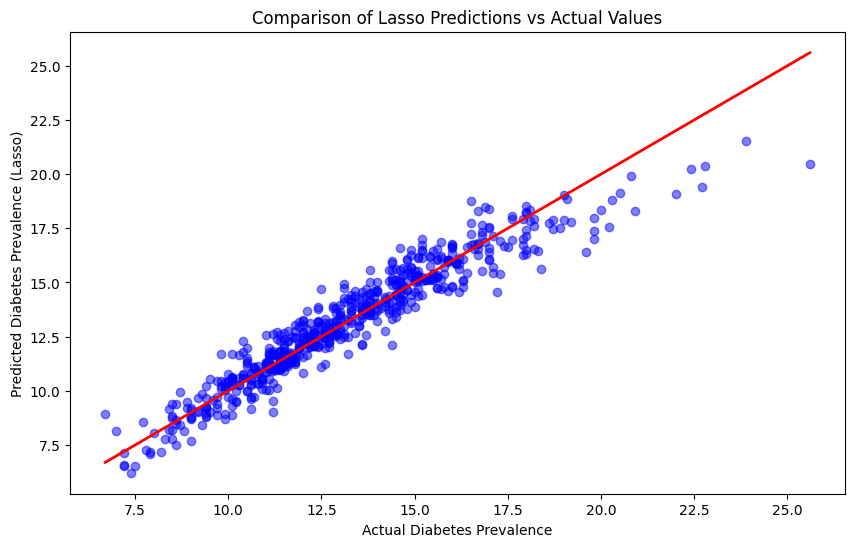

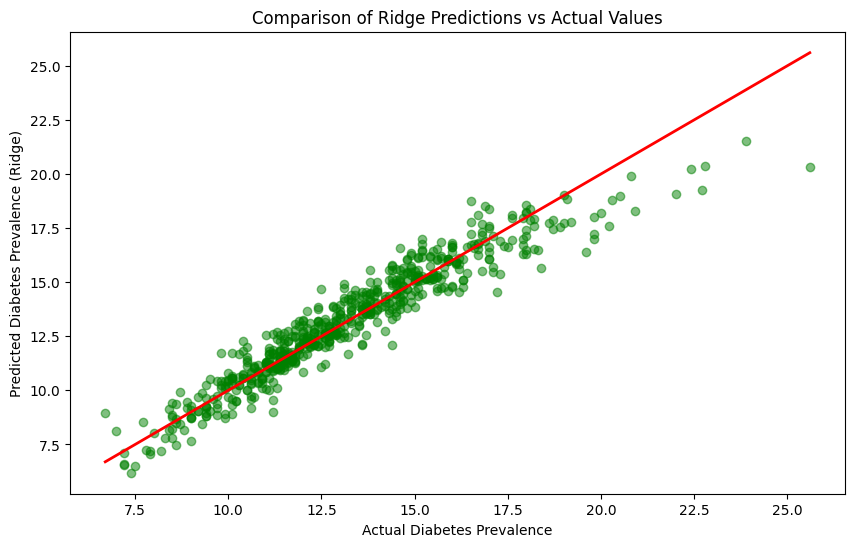

In [22]:
import matplotlib.pyplot as plt

# Gráfico para Lasso optimizado
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso_opt, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Diabetes Prevalence')
plt.ylabel('Predicted Diabetes Prevalence (Lasso)')
plt.title('Comparison of Lasso Predictions vs Actual Values')
plt.show()

# Gráfico para Ridge optimizado
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge_opt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Diabetes Prevalence')
plt.ylabel('Predicted Diabetes Prevalence (Ridge)')
plt.title('Comparison of Ridge Predictions vs Actual Values')
plt.show()

Optimized Ridge Regression - Best Alpha: 0.5689866029018293
Optimized Ridge MSE: 0.7247433378402081, Ridge R²: 0.9098931187627889
Optimized Lasso Regression - Best Alpha: 0.00014563484775012445
Optimized Lasso MSE: 0.7209939699747465, Lasso R²: 0.910359275300322

En base a estos resultados. Lasso optimizado es un poco mejor.